In [194]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [195]:
insurance = pd.read_csv("insurance.csv")
insurance1 =insurance.drop(labels='region', axis=1)

In [196]:
insurance1.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [197]:
len(insurance1)

1338

In [198]:
fy = insurance1.loc[((insurance1['sex']=='female')& (insurance1['smoker']=='yes'))]#female smokers
fy1 = fy.drop(labels=['sex','smoker'], axis=1)

In [199]:
fn = insurance1.loc[((insurance1['sex']=='female')& (insurance1['smoker']=='no'))]#female non-smokers
fn1 = fn.drop(labels=['sex','smoker'], axis=1)

In [200]:
my = insurance1.loc[((insurance1['sex']=='male')& (insurance1['smoker']=='yes'))]#male smokers
my1 = my.drop(labels=['sex','smoker'], axis=1)

In [201]:
mn = insurance1.loc[((insurance1['sex']=='male')& (insurance1['smoker']=='no'))]#male non-smokers
mn1 = mn.drop(labels=['sex','smoker'], axis=1)

# I divieded dataframe to four independent categories

In [202]:
fy1.head()

,age,bmi,children,charges
0,19,27.90,0,16884.9240
11,62,26.29,0,27808.7251
23,34,31.92,1,37701.8768
58,53,22.88,1,23244.7902
64,20,22.42,0,14711.7438


In [203]:
fn1.head()

,age,bmi,children,charges
5,31,25.74,0,3756.62160
6,46,33.44,1,8240.58960
7,37,27.74,3,7281.50560
9,60,25.84,0,28923.13692
13,56,39.82,0,11090.71780


In [204]:
my1.head()

,age,bmi,children,charges
14,27,42.13,0,39611.75770
19,30,35.30,0,36837.46700
29,31,36.30,2,38711.00000
30,22,35.60,0,35585.57600
34,28,36.40,1,51194.55914


In [205]:
mn1.head()

,age,bmi,children,charges
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
8,37,29.830,2,6406.41070


In [206]:
fy1.describe()

,age,bmi,children,charges
count,115.000000,115.000000,115.000000,115.000000
mean,38.608696,29.608261,1.008696,30678.996276
std,14.217419,6.663802,1.135516,11907.536381
min,18.000000,17.195000,0.000000,13844.506000
25%,26.500000,24.650000,0.000000,19696.432100
50%,39.000000,28.380000,1.000000,28950.469200
75%,48.500000,34.352500,2.000000,40918.314500
max,64.000000,47.600000,5.000000,63770.428010


In [207]:
fn1.describe()

,age,bmi,children,charges
count,547.000000,547.000000,547.000000,547.00000
mean,39.691042,30.539525,1.087751,8762.29730
std,14.025538,5.901781,1.204226,6060.77597
min,18.000000,16.815000,0.000000,1607.51010
25%,27.000000,26.357500,0.000000,4265.59910
50%,40.000000,30.210000,1.000000,7639.41745
75%,52.000000,34.307500,2.000000,11786.16660
max,64.000000,48.070000,5.000000,36910.60803


In [208]:
my1.describe()

,age,bmi,children,charges
count,159.000000,159.000000,159.000000,159.000000
mean,38.446541,31.504182,1.188679,33042.005975
std,13.751247,5.952028,1.170144,11202.670862
min,18.000000,17.290000,0.000000,12829.455100
25%,27.000000,27.360000,0.000000,21241.526875
50%,38.000000,31.130000,1.000000,36085.219000
75%,49.500000,35.565000,2.000000,41797.589050
max,64.000000,52.580000,4.000000,62592.873090


In [209]:
mn1.describe()

,age,bmi,children,charges
count,517.000000,517.000000,517.000000,517.000000
mean,39.061896,30.770580,1.092843,8087.204731
std,14.150768,6.192641,1.233844,5908.108989
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,3659.346000
50%,39.000000,30.495000,1.000000,6985.506950
75%,51.000000,34.430000,2.000000,10959.330000
max,64.000000,53.130000,5.000000,32108.662820


In [210]:
corrfy1 = fy1.corr()
corrfy1

,age,bmi,children,charges
age,1.000000,0.123585,0.071392,0.360157
bmi,0.123585,1.000000,-0.115732,0.845910
children,0.071392,-0.115732,1.000000,-0.016352
charges,0.360157,0.845910,-0.016352,1.000000


In [211]:
corrfn1 = fn1.corr()
corrfn1

,age,bmi,children,charges
age,1.000000,0.089160,0.079141,0.621786
bmi,0.089160,1.000000,0.051120,0.075093
children,0.079141,0.051120,1.000000,0.176355
charges,0.621786,0.075093,0.176355,1.000000


In [212]:
corrmy1 = my1.corr()
corrmy1

,age,bmi,children,charges
age,1.000000,0.009196,0.089524,0.379154
bmi,0.009196,1.000000,0.047140,0.769355
children,0.089524,0.047140,1.000000,0.061737
charges,0.379154,0.769355,0.061737,1.000000


In [213]:
corrmn1 = mn1.corr()
corrmn1

,age,bmi,children,charges
age,1.000000,0.157108,-0.013316,0.634549
bmi,0.157108,1.000000,-0.012269,0.095904
children,-0.013316,-0.012269,1.000000,0.100066
charges,0.634549,0.095904,0.100066,1.000000


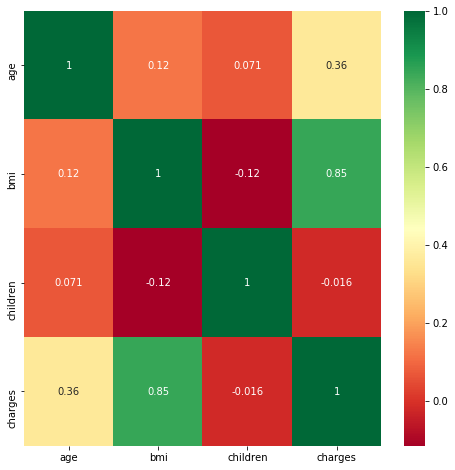

In [214]:
plt.subplots(figsize=(8,8))
sns.heatmap(corrfy1,cmap= 'RdYlGn',annot=True)
plt.show()

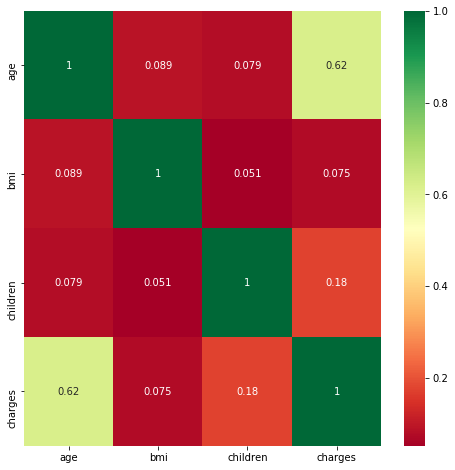

In [215]:
plt.subplots(figsize=(8,8))
sns.heatmap(corrfn1,cmap= 'RdYlGn',annot=True)
plt.show()

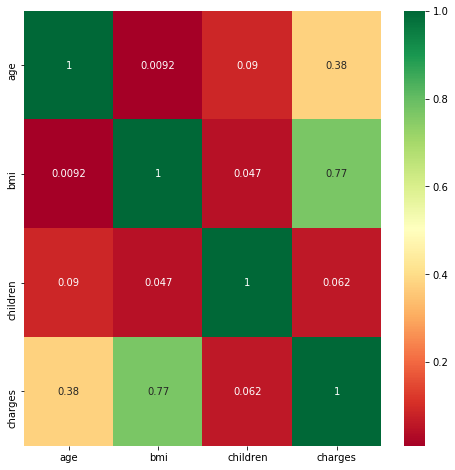

In [216]:
plt.subplots(figsize=(8,8))
sns.heatmap(corrmy1,cmap= 'RdYlGn',annot=True)
plt.show()

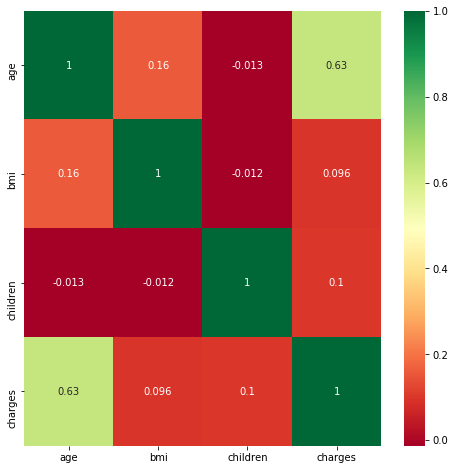

In [217]:
plt.subplots(figsize=(8,8))
sns.heatmap(corrmn1,cmap= 'RdYlGn',annot=True)
plt.show()

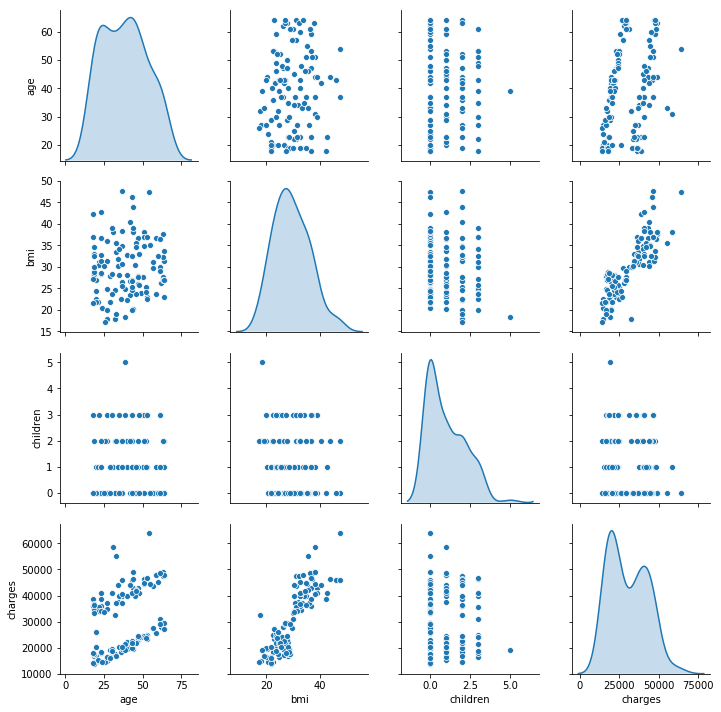

In [218]:
sns.pairplot(fy1, diag_kind ="kde")

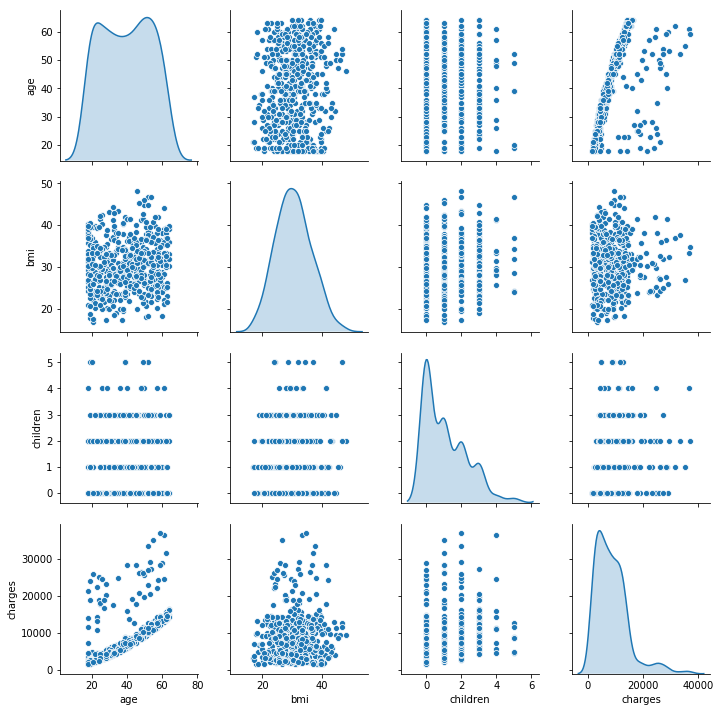

In [219]:
sns.pairplot(fn1, diag_kind ="kde")

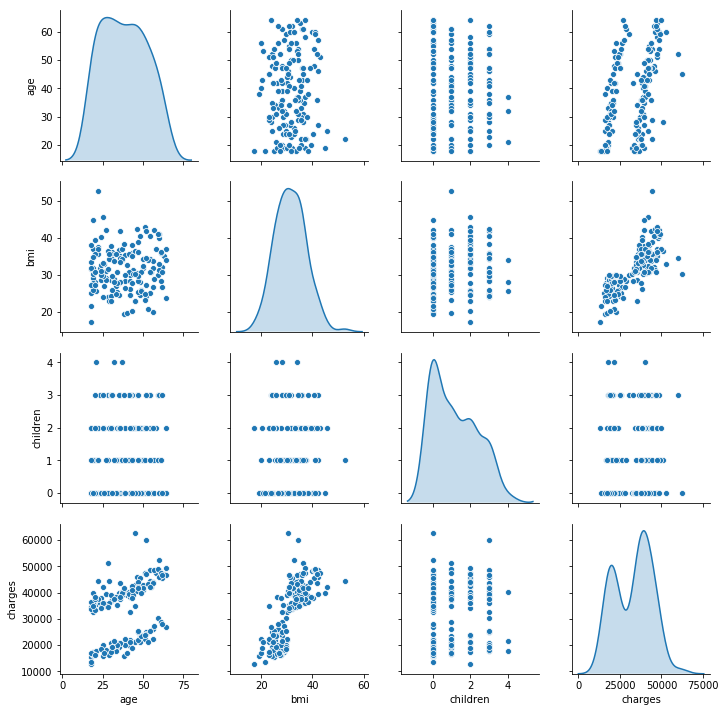

In [220]:
sns.pairplot(my1, diag_kind ="kde")

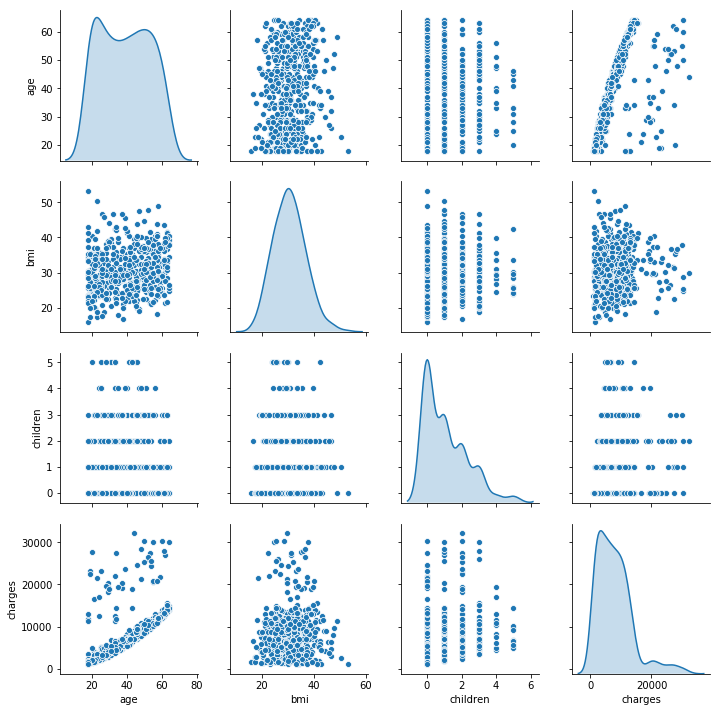

In [221]:
sns.pairplot(mn1, diag_kind ="kde")

# 1. Linear regression for "female smokers"


In [222]:
y1 = fy1['charges']
x1 = fy1.drop(labels='charges', axis=1)

In [223]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1,y1,test_size=0.25,random_state=999)

In [224]:
print(train_x1.shape)
print(train_y1.shape)
print(test_x1.shape)
print(test_y1.shape)

(86, 3)
(86,)
(29, 3)
(29,)


In [225]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [226]:
reg1=lm.fit(train_x1, train_y1)

In [227]:
predicted_y1 = lm.predict(test_x1)

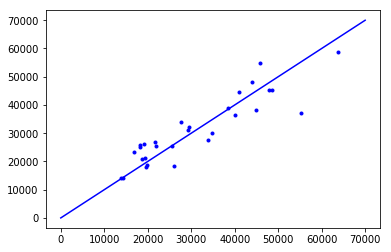

In [228]:
plt.plot(test_y1, predicted_y1, '.', color='blue')

# plot a line, a perfit predict would all fall on this line
x1 = np.linspace(0, 70000, 100)
y1 = x1
plt.plot(x1, y1, color='blue')
plt.show()

In [229]:
from sklearn import metrics as mt
print("1) The model explains,", np.round(mt.explained_variance_score(test_y1,predicted_y1)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y1,predicted_y1 ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y1,predicted_y1),2))

1) The model explains, 81.5 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 4465.76
3) The R-Square score of the model is  0.81


In [230]:
coeff1 = pd.Series(lm.coef_, index = train_x1.columns)
intercept1 = lm.intercept_
print("Coefficients:\n")
print(coeff1)
print("\n")
print("Intercept:\n")
print(intercept1)
print("\n")

Coefficients:

age          205.676995
bmi         1457.141461
children     947.716626
dtype: float64


Intercept:

-21292.934886612635




In [231]:
print('\nCoefficient of model :', lm.coef_)

# intercept of the model
print('\nIntercept of model',lm.intercept_)


Coefficient of model : [ 205.67699547 1457.14146135  947.71662576]

Intercept of model -21292.934886612635


In [232]:
predict_train1 = lm.predict(train_x1)
print(predict_train1)

[33612.46411866 11005.64767512 37838.85177758 33159.75503157
 34308.64491928 35835.18179101 15213.95541999 36104.91388276
 30978.39245537 28926.13076999 15812.53957461 27178.76627649
 44655.39590153 16510.23891262 46026.83290283 43215.65693323
 24785.64852555 22877.9984713  23584.60479912 24689.31078015
 31275.63702221 41310.67930394 25397.06419181 24697.17343124
 25320.8572728  16311.8944612  29957.45410673 38921.07005244
 22189.2061231  30668.04313265 26105.46179517 13070.28028091
 13543.85579167 23866.60279827 30551.99285115 42256.77464719
 57572.48075777 43958.90635946 39533.01809365 37694.18423808
 23895.05913487 39940.44302695 29767.28785157 21134.40891776
 30860.88181277 17319.52709955 38444.71937161 53606.22490444
 26742.14940931 20324.59515961 25370.07502004 28856.67945125
 46678.15010786 42069.49084303 27854.66213305 33345.77539932
 14586.28888032 21398.894875   15489.71658636 12318.75218122
 41540.57256902 46161.33001611 36834.00791675 26373.9259147
 30155.73584605 44512.512

In [233]:
rmse_train1 = mean_squared_error(train_y1,predict_train1)**(0.5)
print('\nRMSE on train dataset : ', rmse_train1)

# predict the target on the testing dataset
predict_test1 = lm.predict(test_x1)
print(predict_test1)

# Root Mean Squared Error on testing dataset
rmse_test1 = mean_squared_error(test_y1,predict_test1)**(0.5)
print('\nRMSE on test dataset : ', rmse_test1)


RMSE on train dataset :  5430.774960901675
[25003.21997487 33868.04081818 37266.64208583 38766.44664858
 25438.00326558 14234.89773871 23269.17479911 18655.00976298
 13970.93508479 32085.819966   25310.68911449 45219.17053422
 38331.92526257 26726.42410713 44621.89892065 45361.5302986
 54871.11143319 58896.6995516  25899.31286895 26331.94703803
 30014.58587762 20938.26722844 36587.38957961 21207.26145501
 48065.73296953 27529.05943891 18403.99950907 18189.82701035
 31045.64101201]

RMSE on test dataset :  5716.378375804961


In [234]:
from sklearn.metrics import r2_score 
r2_score(test_y1,predicted_y1)

0.8145454805982509

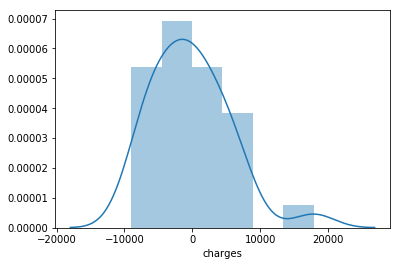

In [235]:
res1 = test_y1 - predicted_y1
sns.distplot(res1)

In [236]:
z1=pd.DataFrame({'actual':test_y1,'predicted':predicted_y1})
z1.head()

,actual,predicted
1204,18223.45120,25003.219975
843,27533.91290,33868.040818
819,55135.40209,37266.642086
240,38511.62830,38766.446649
1045,21880.82000,25438.003266


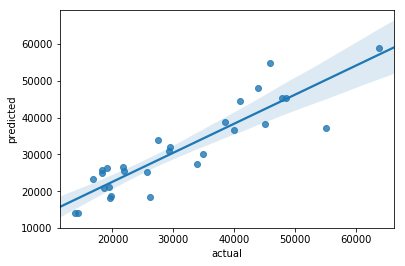

In [237]:
sns.regplot('actual','predicted',data=z1)

# 2. Linear regression for "female non-smokers"

In [238]:
y2 = fn1['charges']
x2 = fn1.drop(labels='charges', axis=1)

In [239]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2,y2,test_size=0.25,random_state=999)

In [240]:
print(train_x2.shape)
print(train_y2.shape)
print(test_x2.shape)
print(test_y2.shape)

(410, 3)
(410,)
(137, 3)
(137,)


In [241]:
reg2=lm.fit(train_x2, train_y2)

In [242]:
predicted_y2 = lm.predict(test_x2)

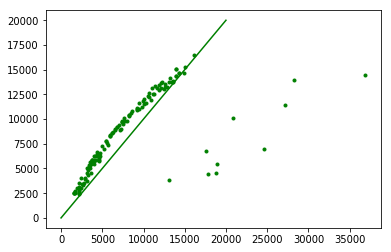

In [243]:
plt.plot(test_y2, predicted_y2, '.', color='green')

# plot a line, a perfit predict would all fall on this line
x2 = np.linspace(0, 20000, 100)
y2 = x2
plt.plot(x2, y2, color='green')
plt.show()

In [244]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y2,predicted_y2)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y2,predicted_y2 ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y2,predicted_y2),2))

1) The model explains, 47.35 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 2417.32
3) The R-Square score of the model is  0.47


In [245]:
coeff2 = pd.Series(lm.coef_, index = train_x2.columns)
intercept2 = lm.intercept_
print("Coefficients:\n")
print(coeff2)
print("\n")
print("Intercept:\n")
print(intercept2)
print("\n")

Coefficients:

age         262.792659
bmi           7.568704
children    601.369185
dtype: float64


Intercept:

-2469.601291602652




In [246]:
predict_train2 = lm.predict(train_x2)
print(predict_train2)

[ 3005.55507655  9993.55414185  8929.93298803 12978.0146129
  3311.0563676  11371.05953099  8336.85153368 12111.94106632
  9959.53281931  2806.75580611 13893.7738713   3244.31710183
  6341.09875083  3024.36330492  2488.59808039 10894.95400728
 10989.75484659  6181.64286635  8587.32834979 12548.17339482
  3339.77959764  5141.38786274  4816.34261678 10749.34885033
  5976.71294602 12830.55229647  4499.1281519  13570.46942716
 11354.69160446  9974.3463345   5285.29006139  4013.09213693
  3017.77853281 11045.91624406  2557.05700417 10396.71123575
  8816.47367743 14598.63120476  5151.75698663 12452.65635578
 13243.30494419 12438.275819    8108.4797761  13493.53355538
 12071.22144113  9419.99994271 15792.74125221  9902.78424226
 10877.11139368 13012.31915677  5912.09291725 10475.4847402
  4808.20626045  2562.05234852 14119.93400514 15041.3196921
  6643.66777431  8331.66414463 10023.09322958 13089.5773035
  6158.72639425  6943.9466599  10521.63713226  5708.54650737
  2800.28456456 11189.516904

In [247]:
rmse_train2 = mean_squared_error(train_y2,predict_train2)**(0.5)
print('\nRMSE on train dataset : ', rmse_train2)

# predict the target on the testing dataset
predict_test2 = lm.predict(test_x2)
print(predict_test2)

# Root Mean Squared Error on testing dataset
rmse_test2 = mean_squared_error(test_y2,predict_test2)**(0.5)
print('\nRMSE on test dataset : ', rmse_test2)


RMSE on train dataset :  4809.2424110788215
[ 8869.09731105  4859.0134052   8870.2537604   3786.55356791
 10972.5950333  13727.56514094  2789.49916197 10363.18187895
  3516.94907559  8544.06876479 13142.52482907 14649.60642329
  3777.68148503 11169.8215757   2497.9454293  13699.39003685
  5074.59122664 11656.08465177  2550.39654503  4063.91598139
 13119.11639123 10432.53234745 11383.77495298  3004.11702287
  9549.27784377  6250.83751667 11241.57288553  6499.80059207
 12050.93731556 10964.39968963 13720.37487255 10095.97984495
  7802.08694032  2539.57329892 14361.08017205 11968.54753311
  9701.60083019 14116.54923235 13912.94383514 13272.44445293
 15049.91017065  5623.83157063  2502.25959033  3144.27271325
 10134.03210719 11066.06852237 13021.87525008  8350.17245196
  5347.41524509  2450.48965793  3903.30526456 13586.02311299
 11659.7371563   5402.83929903  8982.64900839  5774.69697656
  9149.97917169  8266.13869854  3310.33734076  9759.58154363
 13733.42805909  9788.43500393 12359.499

In [248]:
r2_score(test_y2,predicted_y2)

0.470191208425642

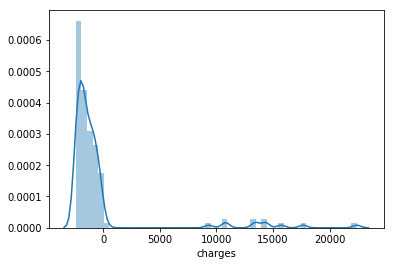

In [249]:
res2 = test_y2 - predicted_y2
sns.distplot(res2)

In [250]:
z2=pd.DataFrame({'actual':test_y2,'predicted':predicted_y2})
z2.head()

,actual,predicted
669,6500.23590,8869.097311
1302,3208.78700,4859.013405
1290,7133.90250,8870.253760
1189,13126.67745,3786.553568
560,9193.83850,10972.595033


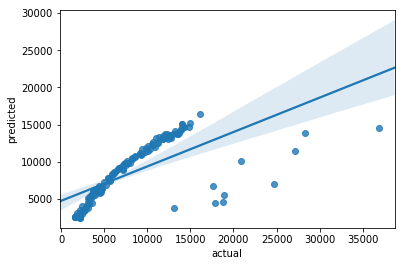

In [251]:
sns.regplot('actual','predicted',data=z2)

# 3. Linear regression for "male smokers"

In [252]:
y3 = my1['charges']
x3 = my1.drop(labels='charges', axis=1)

In [253]:
train_x3, test_x3, train_y3, test_y3 = train_test_split(x3,y3,test_size=0.25,random_state=999)

In [254]:
reg3=lm.fit(train_x3, train_y3)

In [255]:
predicted_y3 = lm.predict(test_x3)

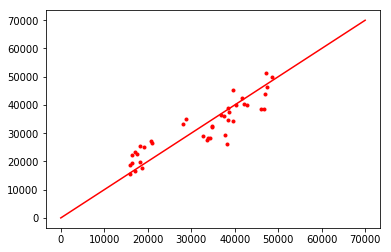

In [256]:
plt.plot(test_y3, predicted_y3, '.', color='red')

# plot a line, a perfit predict would all fall on this line
x3 = np.linspace(0, 70000, 100)
y3 = x3
plt.plot(x3, y3, color='red')
plt.show()

In [257]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y3,predicted_y3)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y3,predicted_y3 ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y3,predicted_y3),2))

1) The model explains, 80.72 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 3970.58
3) The R-Square score of the model is  0.81


In [258]:
coeff3 = pd.Series(lm.coef_, index = train_x3.columns)
intercept3 = lm.intercept_
print("Coefficients:\n")
print(coeff3)
print("\n")
print("Intercept:\n")
print(intercept3)
print("\n")

Coefficients:

age          289.730368
bmi         1431.974156
children    -210.518281
dtype: float64


Intercept:

-23030.36149562528




In [259]:
predict_train3 = lm.predict(train_x3)
print(predict_train3)

[37028.73441089 33146.7703243  39410.17539726 26762.91081604
 37513.29843805 28438.42209058 34187.78285959 30447.03006492
 40777.57391508 13065.30779887 25845.50505046 34631.73013693
 41416.92969413 27403.92836052 35677.90770955 41162.82659005
 26704.37283672 27457.50432672 26229.67426366 40785.6915587
 52764.6287034  35785.86514663 18789.27422152 24771.48914451
 45470.62481244 41351.82996962 41181.87768249 26830.64990075
 27926.07484104 39279.34253366 30910.43118703 36509.36409167
 22628.38059554 37510.90520714 35414.42794877 29159.19563036
 29536.08799362 38295.96096089 36147.964438   36843.23865811
 32097.53863327 42042.07505983 32293.19326429 35393.12042653
 45993.78417675 36844.93571253 22792.55335902 25666.05041768
 30206.03844537 32628.24079876 34975.72064164 37498.40385405
 24422.15715748 50309.78608781 30748.72223244 26113.33323171
 41322.21289172 22036.53984073 40562.4257954  18234.73450178
 22407.85570455 26468.95336173 28583.47318364 26534.40508253
 36995.4298     51489.229

In [260]:
rmse_train3 = mean_squared_error(train_y3,predict_train3)**(0.5)
print('\nRMSE on train dataset : ', rmse_train3)

# predict the target on the testing dataset
predict_test3 = lm.predict(test_x3)
print(predict_test3)

# Root Mean Squared Error on testing dataset
rmse_test3 = mean_squared_error(test_y3,predict_test3)**(0.5)
print('\nRMSE on test dataset : ', rmse_test3)


RMSE on train dataset :  6098.601529784167
[19538.28449207 25603.62188117 27621.32509391 26259.36191955
 26412.12790389 22140.19961339 34806.83199434 23251.84872875
 15616.49369329 18766.434084   16701.42322611 37594.90375592
 51471.10079024 45121.42962652 22684.80330104 29045.94746702
 34971.86101856 32307.2161205  36539.59130101 28407.4444875
 32450.41353609 44027.66645165 46271.56821204 42410.11049789
 40008.63646941 17832.64752029 27320.48918712 38762.99104384
 36005.95199628 19970.16410277 29236.9258581  39831.14138109
 50071.55516252 25126.72198924 34399.64619863 40304.59986933
 38513.56853459 38614.29552289 28183.13055142 33159.47140552]

RMSE on test dataset :  4826.450602621018


In [261]:
r2_score(test_y3,predicted_y3)

0.8065942524313161

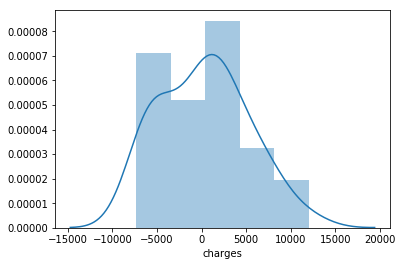

In [262]:
res3 = test_y3 - predicted_y3
sns.distplot(res3)

In [263]:
z3=pd.DataFrame({'actual':test_y3,'predicted':predicted_y3})
z3.head()

,actual,predicted
1026,16450.89470,19538.284492
795,18310.74200,25603.621881
911,33732.68670,27621.325094
524,38245.59327,26259.361920
207,20984.09360,26412.127904


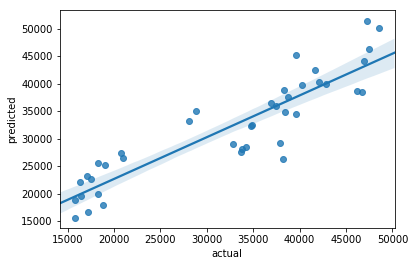

In [264]:
sns.regplot('actual','predicted',data=z3)

# 4. Linear regression for "male non-smokers"

In [265]:
y4 = mn1['charges']
x4 = mn1.drop(labels='charges', axis=1)

In [266]:
train_x4, test_x4, train_y4, test_y4 = train_test_split(x4,y4,test_size=0.25,random_state=999)

In [267]:
reg4=lm.fit(train_x4, train_y4)

In [268]:
predicted_y4 = lm.predict(test_x4)

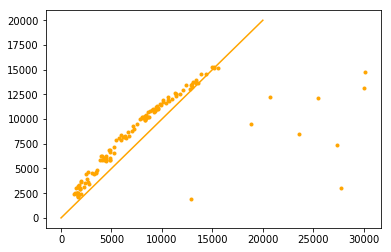

In [269]:
plt.plot(test_y4, predicted_y4, '.', color='orange')

# plot a line, a perfit predict would all fall on this line
x4 = np.linspace(0, 20000, 100)
y4 = x2
plt.plot(x4, y4, color='orange')
plt.show()

In [270]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y4,predicted_y4)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y4,predicted_y4 ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y4,predicted_y4),2))

1) The model explains, 47.41 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 2306.87
3) The R-Square score of the model is  0.47


In [271]:
coeff4 = pd.Series(lm.coef_, index = train_x4.columns)
intercept4 = lm.intercept_
print("Coefficients:\n")
print(coeff4)
print("\n")
print("Intercept:\n")
print(intercept4)
print("\n")

Coefficients:

age         263.141015
bmi         -15.730076
children    476.376987
dtype: float64


Intercept:

-2168.67801566418




In [272]:
predict_train4 = lm.predict(train_x4)
print(predict_train4)

[11701.9305433   2677.41188814  7958.01922278  9586.33916126
 13355.41584476  6738.54701952  8157.75599415 11103.40676134
  5691.76238139  8323.17253623 10373.46654924  7083.32712718
 11717.34601736  7083.05322982 11284.657936   13809.44132722
  5797.54989749  6650.88979447  8945.68468342  5727.62695368
  2626.40849708  8015.78930425 13842.21262813 12552.5435837
  7091.34946572  2777.63002492  6472.66803832  6214.74385442
  2093.75578551  3354.87474279 12528.51175638  2349.81826699
 12428.23252466  3929.56746027  9673.99638631  2598.91881107
 12903.85167272  2865.63979771 10674.54664185 12757.04660562
 13165.18372952 12159.25934163 11323.51122265  3774.61141845
  2352.80698135 12266.55325449  2519.54578234 11525.3835938
  3582.62584618 10572.94146284 10443.83548868  5708.00506337
  4184.33358948 12195.33671634 12726.99012172  5022.91312207
  4735.74027927 12768.33707173 11407.04996348  7236.69536394
  5822.36271273 14071.61538945  2798.39372467  3740.87040636
  6109.30888605 14127.5737

In [273]:
rmse_train4 = mean_squared_error(train_y4,predict_train4)**(0.5)
print('\nRMSE on train dataset : ', rmse_train4)

# predict the target on the testing dataset
predict_test4 = lm.predict(test_x4)
print(predict_test4)

# Root Mean Squared Error on testing dataset
rmse_test4 = mean_squared_error(test_y4,predict_test4)**(0.5)
print('\nRMSE on test dataset : ', rmse_test4)


RMSE on train dataset :  4565.865111587523
[ 2901.50436999  9034.88900939  8331.95822982  5895.44095331
 11543.86643259  2569.85887543  8801.63513748 12196.75242314
 10253.46087019 12116.82608383 10105.89796388  8226.49642437
  6057.11094182  2393.15462517 15308.8625781  12219.58418143
 10173.96848693 15222.41101536 12956.15417398  2556.03955765
 11158.85251978  2920.4184069  13279.20362865  4406.65505887
  5910.07268151  3121.3090273   3976.48378961 11032.88052115
  2978.61968649  7862.36832376  6910.45359672  6658.08492508
 10753.8928335   2513.03259848  3778.62258772 10795.1435777
 13139.94899782 12531.93718471 14760.1910961  10898.84547983
  8137.73809403  3089.21967314  3651.482873   11807.21473464
 10288.14568681 11255.51659205  6290.36481373 12538.50311229
  8649.66781001  6239.9906257  12495.75801091 11314.07317731
 10101.80538631  6067.88328566 11686.31706434 14544.86951033
  9543.71065648  3459.4797453   3371.39408006  4502.14865713
  3508.48168861  7196.47911423  2992.18825

In [274]:
r2_score(test_y4,predicted_y4)

0.47254942208891204

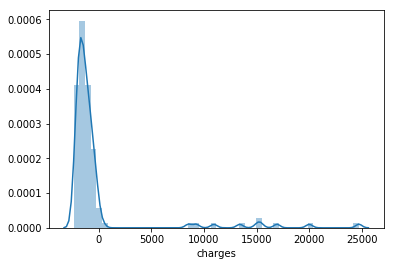

In [275]:
res4 = test_y4 - predicted_y4
sns.distplot(res4)

In [276]:
z4=pd.DataFrame({'actual':test_y4,'predicted':predicted_y4})
z4.head()

,actual,predicted
751,1906.35825,2901.504370
774,7261.74100,9034.889009
582,6356.27070,8331.958230
884,4877.98105,5895.440953
1028,9850.43200,11543.866433


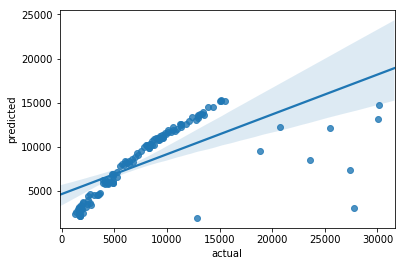

In [277]:
sns.regplot('actual','predicted',data=z4)

# 5. Linear regression for "all data"

In [278]:
alldata = insurance1.drop(labels=['sex','smoker'], axis=1)

In [279]:
alldata.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [280]:
print(len(alldata))

1338


In [281]:
corrall = alldata.corr()

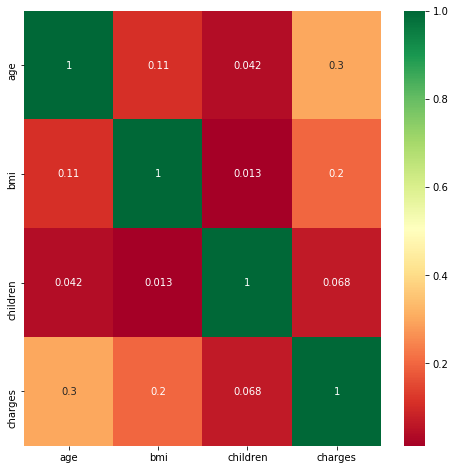

In [282]:
plt.subplots(figsize=(8,8))
sns.heatmap(corrall,cmap= 'RdYlGn',annot=True)
plt.show()

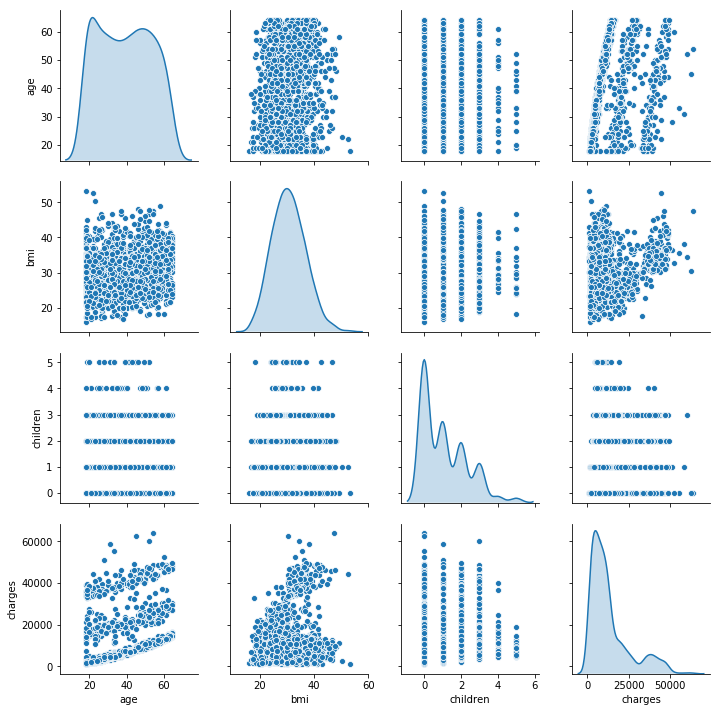

In [283]:
sns.pairplot(alldata, diag_kind ="kde")

In [284]:
y5 = alldata['charges']
x5 = alldata.drop(labels='charges', axis=1)

In [287]:
train_x5, test_x5, train_y5, test_y5 = train_test_split(x5,y5,test_size=0.25,random_state=999)

In [288]:
reg5=lm.fit(train_x5, train_y5)

In [289]:
predicted_y5 = lm.predict(test_x5)

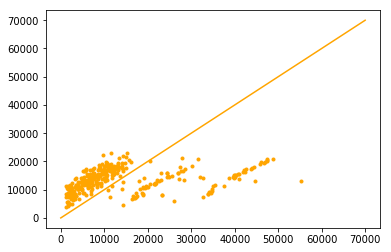

In [292]:
plt.plot(test_y5, predicted_y5, '.', color='orange')

# plot a line, a perfit predict would all fall on this line
x5 = np.linspace(0, 70000, 100)
y5 = x5
plt.plot(x5, y5, color='orange')
plt.show()

In [293]:
insurance1.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [295]:
corrall1 = insurance1.corr()

In [296]:
corrall1

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000
